# OMI SO<sub>2</sub> Observations

## Purpose:
- To visualize SO<sub>2</sub> mass estimates calculated from processing of OMI satellite data. The processing is currently unsupported work by Jeremy Cole-Baker completed in 2010.
- Make simple mass vs time plots. Do this for Vanuatu, and separately for all other areas. For Vanuatu, several shorter duration plots are also produced, to help visualize the effects of recent activity.

## Data File:
- so2_summary.csv
- The file is created automatically and shows the total mass seen in each of the scenes.
- The scenes are pre-selected.
- A few months into the observation period, two additional scenes were added: Vanuatu - Ambae and Vanuatu - Tanna. The mass estimates for these scenes were placed in columns immediately after Vanuatu - Ambrym. Columns that were to the right of Vanuatu - Ambrym in so2_summary.csv moved two columns to the right. The column headers for the file were not changed when the two additional scenes were added.
- The data file is read in two parts, and then concatenated, to account for the chnage in number of columns part way through the file.

## Analysis:
The data file is from analysis from "middle troposheric SO<sub>2</sub> retrieval"

## Author:
Steven Sherburn
## Date:
July 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Read data file ##

**First part of file**

In [4]:
names1 = ['Date','South West Pacific','South East Pacific','PNG/Solomon Islands','Vanuatu','Vanuatu - Gaua','Vanuatu - Ambrym','New Caledonia','Samoa','Raoul/Curtis','Society Islands','New Zealand']

In [5]:
df1 = pd.read_csv('so2_summary.csv', names=names1, skiprows=1, nrows=88, parse_dates=True, index_col='Date')
df1['Vanuatu - Ambae'] = np.NaN
df1['Vanuatu - Tanna'] = np.NaN

**Second part of file**

In [6]:
names2 = ['Date','South West Pacific','South East Pacific','PNG/Solomon Islands','Vanuatu','Vanuatu - Gaua','Vanuatu - Ambrym','Vanuatu - Ambae','Vanuatu - Tanna','New Caledonia','Samoa','Raoul/Curtis','Society Islands','New Zealand']

In [7]:
df2 = pd.read_csv('so2_summary.csv', names=names2, skiprows=89, parse_dates=True, index_col='Date')

**Concatentate partts**

In [8]:
df = pd.concat([df1, df2], sort=True)

In [13]:
df2.head()

,South West Pacific,South East Pacific,PNG/Solomon Islands,Vanuatu,Vanuatu - Gaua,Vanuatu - Ambrym,Vanuatu - Ambae,Vanuatu - Tanna,New Caledonia,Samoa,Raoul/Curtis,Society Islands,New Zealand
Date,,,,,,,,,,,,,
2010-05-31,251.46,318.91,6.54,6.28,0.13,0.23,0.19,0.10,6.91,12.33,5.12,8.48,25.40
2010-06-01,296.83,384.06,7.38,3.66,0.02,0.05,0.05,0.00,3.84,10.82,7.83,9.64,41.59
2010-06-02,262.36,329.94,7.04,3.96,0.19,0.54,0.28,0.06,3.26,10.19,4.52,12.22,31.11
2010-06-03,281.97,416.89,5.71,5.59,0.17,0.37,0.22,0.16,4.42,12.00,6.00,10.66,34.01
2010-06-04,307.51,369.65,7.35,5.49,0.22,0.67,0.39,0.33,5.72,13.98,7.37,10.62,26.35


## Visualize data  - Vanuatu##

**All available data**

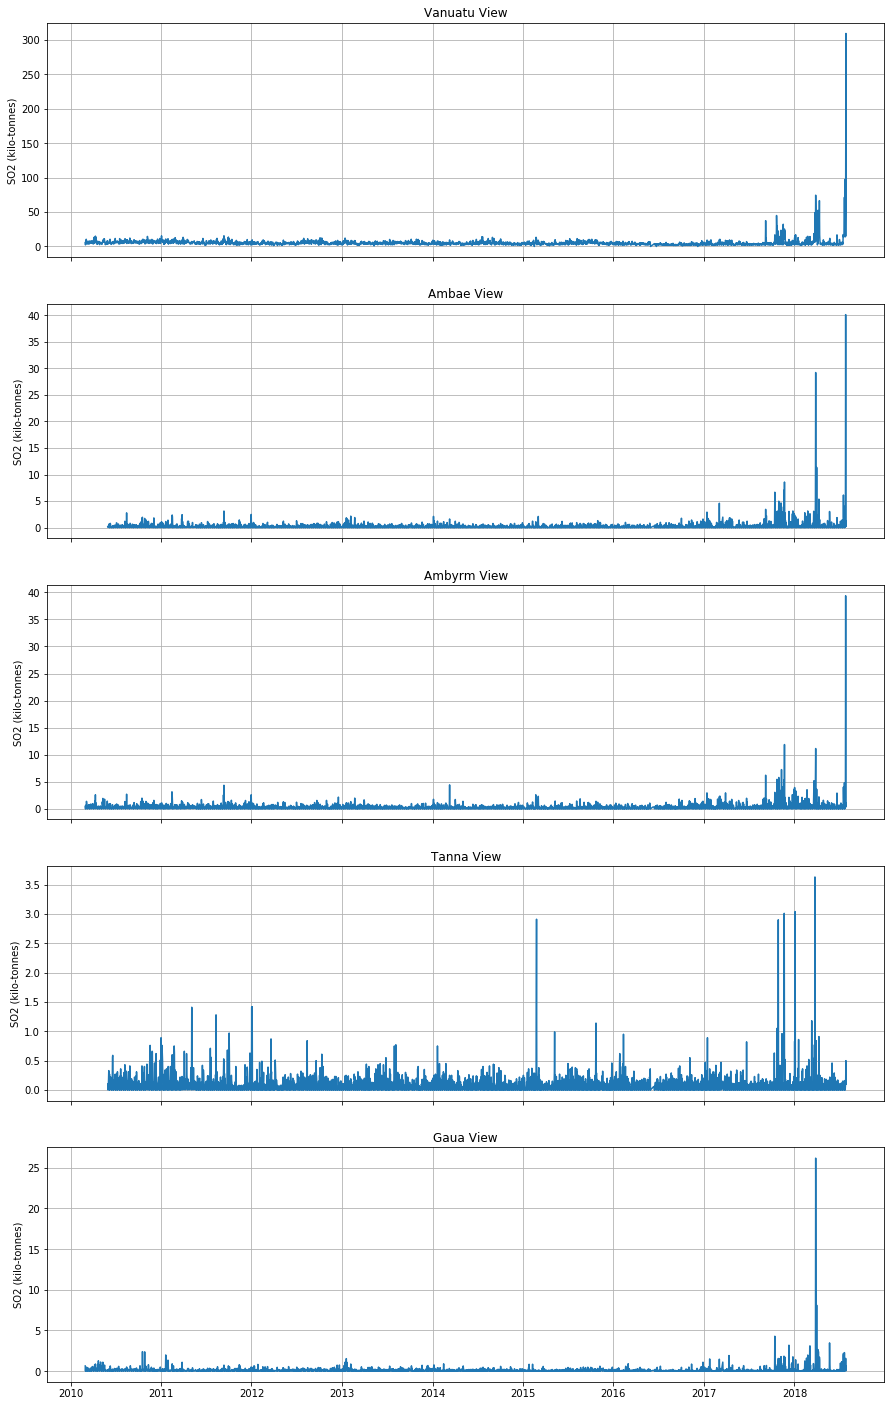

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(15,25), sharex=True)

#Vanuatu
ax1.plot(df['Vanuatu'])
ax1.set_title('Vanuatu View')
ax1.set_ylabel('SO2 (kilo-tonnes)')
ax1.grid()
#Ambae
ax2.plot(df['Vanuatu - Ambae'])
ax2.set_title('Ambae View')
ax2.set_ylabel('SO2 (kilo-tonnes)')
ax2.grid()
#Ambrym
ax3.plot(df['Vanuatu - Ambrym'])
ax3.set_title('Ambyrm View')
ax3.set_ylabel('SO2 (kilo-tonnes)')
ax3.grid()
#Tanna
ax4.plot(df['Vanuatu - Tanna'])
ax4.set_title('Tanna View')
ax4.set_ylabel('SO2 (kilo-tonnes)')
ax4.grid()
#Gaua
ax5.plot(df['Vanuatu - Gaua'])
ax5.set_title('Gaua View')
ax5.set_ylabel('SO2 (kilo-tonnes)')
ax5.grid()

plt.savefig('omi_so2_vanuatu.png')

**Data since July 2017**

In [11]:
dfrecent = df[df.index>='2017-07-01']

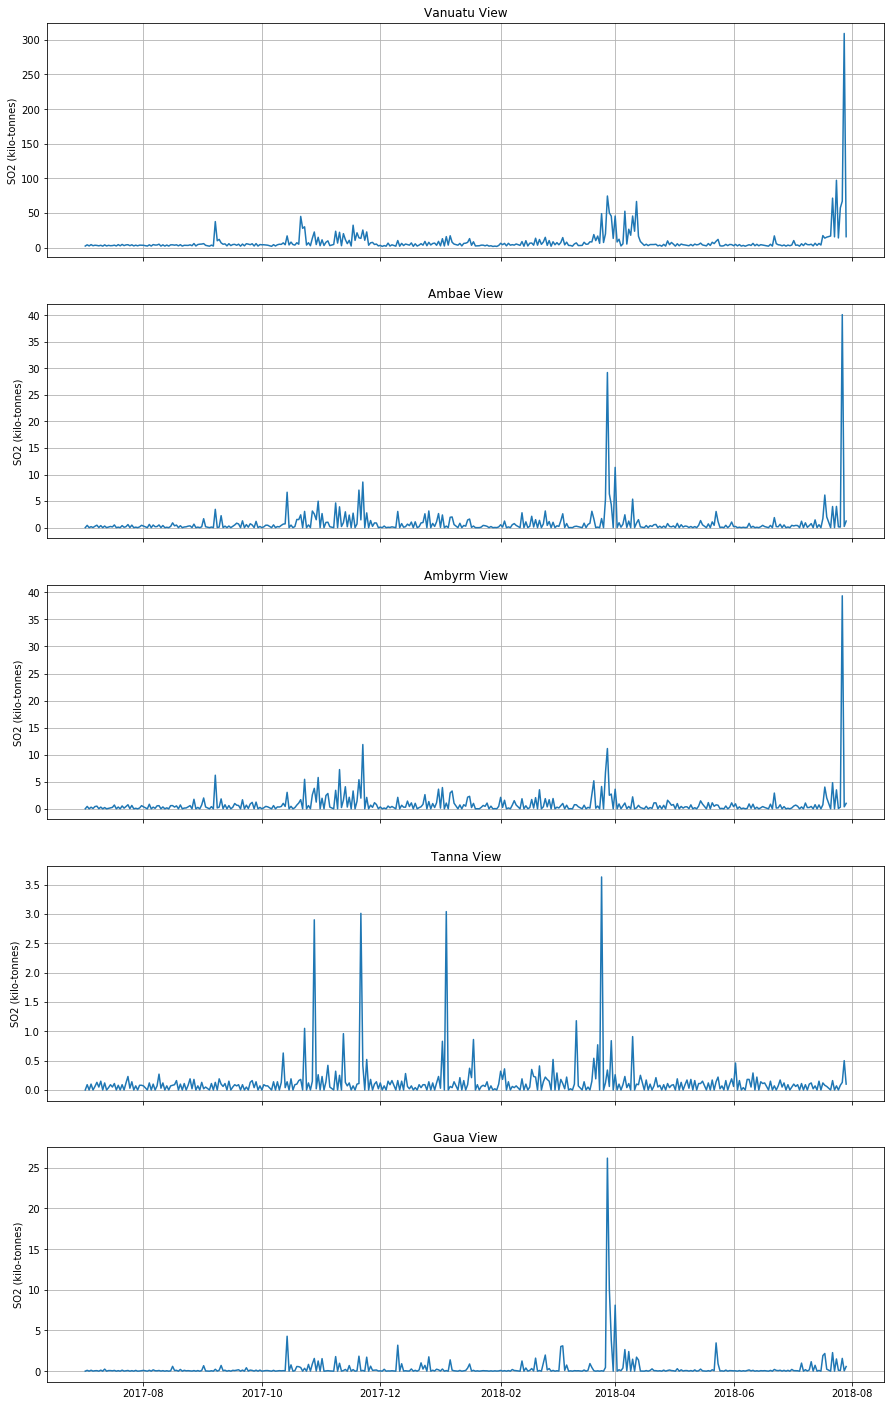

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(15,25), sharex=True)

#Vanuatu
ax1.plot(dfrecent['Vanuatu'])
ax1.set_title('Vanuatu View')
ax1.set_ylabel('SO2 (kilo-tonnes)')
ax1.grid()
#Ambae
ax2.plot(dfrecent['Vanuatu - Ambae'])
ax2.set_title('Ambae View')
ax2.set_ylabel('SO2 (kilo-tonnes)')
ax2.grid()
#Ambrym
ax3.plot(dfrecent['Vanuatu - Ambrym'])
ax3.set_title('Ambyrm View')
ax3.set_ylabel('SO2 (kilo-tonnes)')
ax3.grid()
#Tanna
ax4.plot(dfrecent['Vanuatu - Tanna'])
ax4.set_title('Tanna View')
ax4.set_ylabel('SO2 (kilo-tonnes)')
ax4.grid()
#Gaua
ax5.plot(dfrecent['Vanuatu - Gaua'])
ax5.set_title('Gaua View')
ax5.set_ylabel('SO2 (kilo-tonnes)')
ax5.grid()

plt.savefig('omi_so2_vanuatu_recent.png')

## Visualize data  - Other Views##

**All available data**

In [14]:
df.columns

Index(['New Caledonia', 'New Zealand', 'PNG/Solomon Islands', 'Raoul/Curtis',
       'Samoa', 'Society Islands', 'South East Pacific', 'South West Pacific',
       'Vanuatu', 'Vanuatu - Ambae', 'Vanuatu - Ambrym', 'Vanuatu - Gaua',
       'Vanuatu - Tanna'],
      dtype='object')

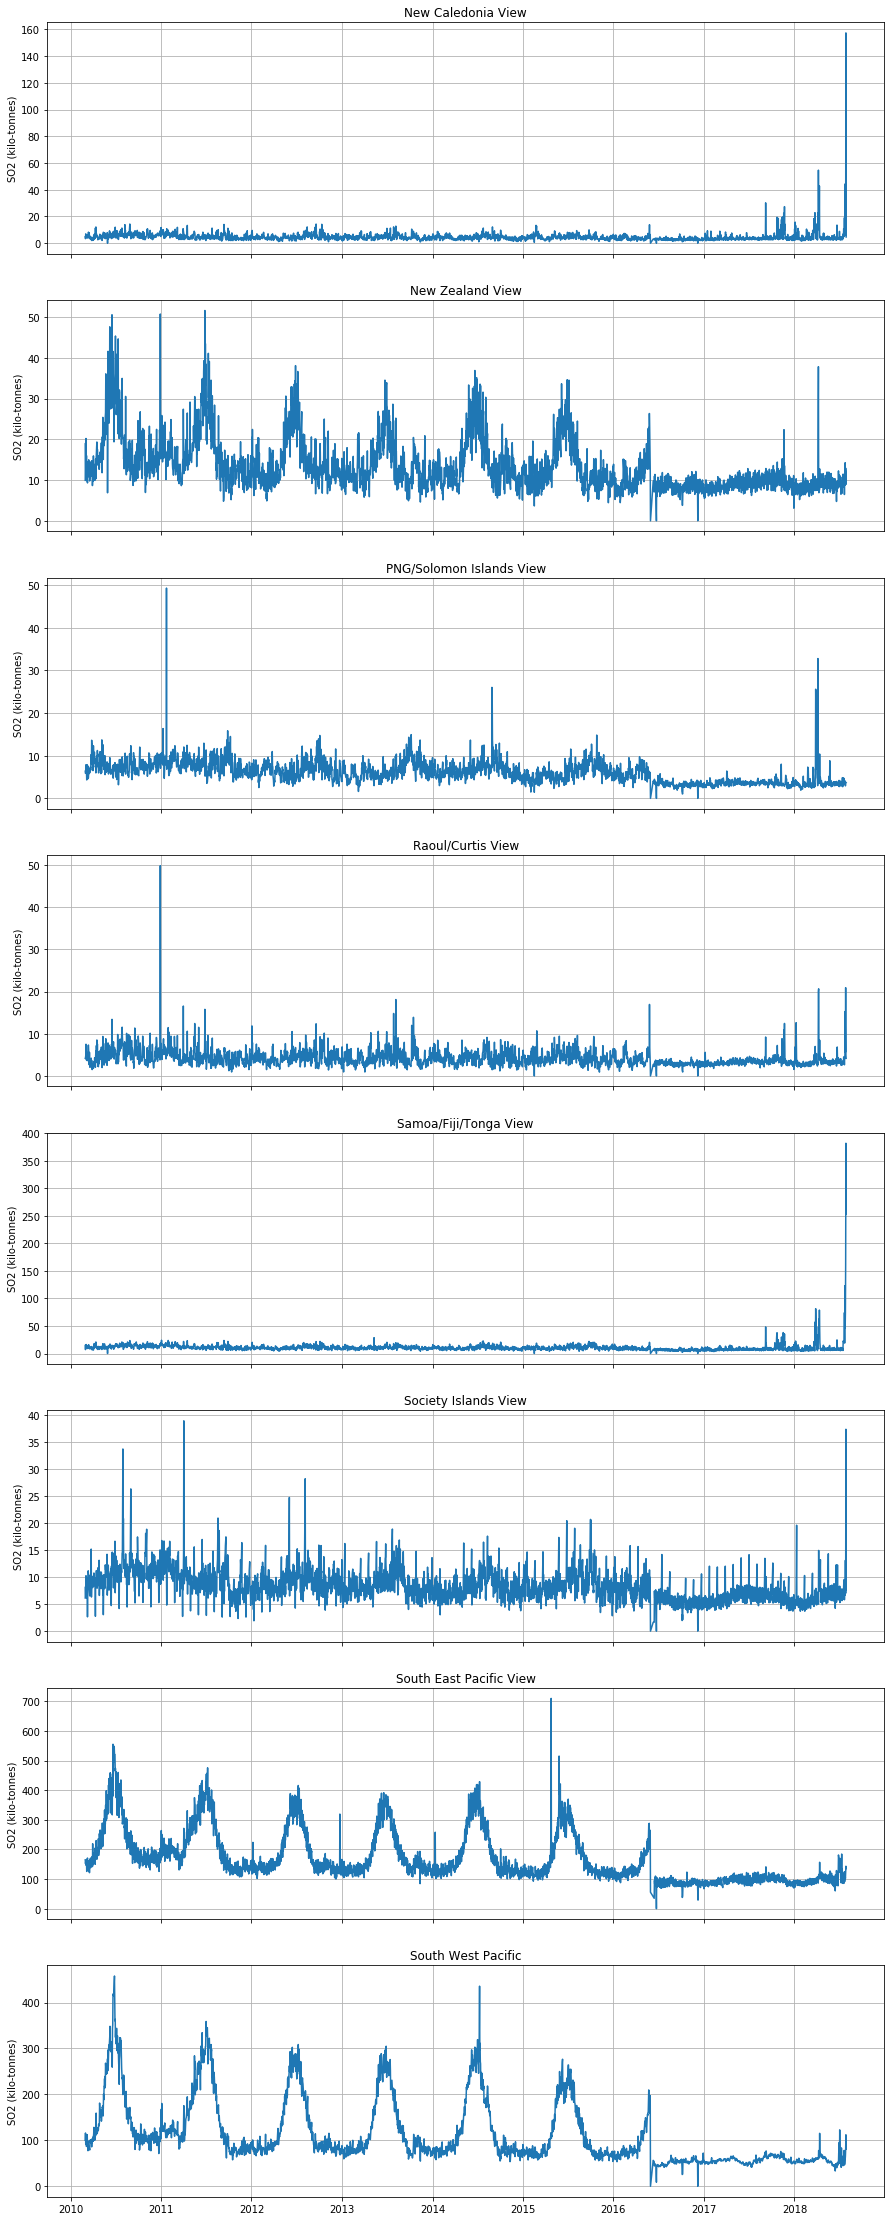

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8,1, figsize=(15,40), sharex=True)

#New Caledonia
ax1.plot(df['New Caledonia'])
ax1.set_title('New Caledonia View')
ax1.set_ylabel('SO2 (kilo-tonnes)')
ax1.grid()
#New Zealand
ax2.plot(df['New Zealand'])
ax2.set_title('New Zealand View')
ax2.set_ylabel('SO2 (kilo-tonnes)')
ax2.grid()
#PNG/Solomon Islands
ax3.plot(df['PNG/Solomon Islands'])
ax3.set_title('PNG/Solomon Islands View')
ax3.set_ylabel('SO2 (kilo-tonnes)')
ax3.grid()
#Raoul/Curtis
ax4.plot(df['Raoul/Curtis'])
ax4.set_title('Raoul/Curtis View')
ax4.set_ylabel('SO2 (kilo-tonnes)')
ax4.grid()
#Samoa/Fiji/Tonga
ax5.plot(df['Samoa'])
ax5.set_title('Samoa/Fiji/Tonga View')
ax5.set_ylabel('SO2 (kilo-tonnes)')
ax5.grid()
#Society Islands
ax6.plot(df['Society Islands'])
ax6.set_title('Society Islands View')
ax6.set_ylabel('SO2 (kilo-tonnes)')
ax6.grid()
#South East Pacific
ax7.plot(df['South East Pacific'])
ax7.set_title('South East Pacific View')
ax7.set_ylabel('SO2 (kilo-tonnes)')
ax7.grid()
#South West Pacific
ax8.plot(df['South West Pacific'])
ax8.set_title('South West Pacific')
ax8.set_ylabel('SO2 (kilo-tonnes)')
ax8.grid()

plt.savefig('omi_so2_other.png')